In [1]:
import graphlab

In [2]:
sales = graphlab.SFrame.read_csv("Philadelphia_Crime_Rate_noNA.csv")

This non-commercial license of GraphLab Create for academic use is assigned to workingjhy@gmail.com and will expire on July 31, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1473158824.log


Finished parsing file /Users/jihaoyu/Documents/GitHub/Machine_learning/Course2/Week1/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.025705 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/jihaoyu/Documents/GitHub/Machine_learning/Course2/Week1/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.009124 secs.

In [3]:
sales

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [5]:
graphlab.canvas.set_target("ipynb")
sales.show(view = "Scatter Plot", x = "CrimeRate", y = "HousePrice")

In [8]:
crime_model = graphlab.linear_regression.create(sales, target = "HousePrice", features = ['CrimeRate'], validation_set= None,verbose = False)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/jihaoyu/anaconda/envs/gl-env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


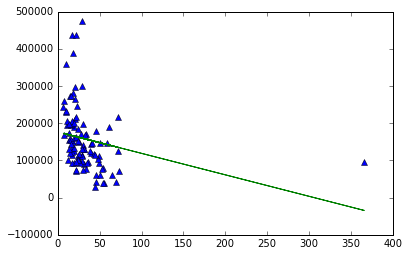

In [15]:
plt.plot(sales['CrimeRate'], sales['HousePrice'], '^', sales['CrimeRate'], crime_model.predict(sales), '-')

In [16]:
 sales_noCC = sales[sales['MilesPhila'] != 0.0]

In [17]:
sales_noCC.show(view = "Scatter Plot", x = "CrimeRate", y = "HousePrice")

In [18]:
crime_model_noCC = graphlab.linear_regression.create(sales_noCC, target = "HousePrice", features = ["CrimeRate"], validation_set = None, verbose = False)

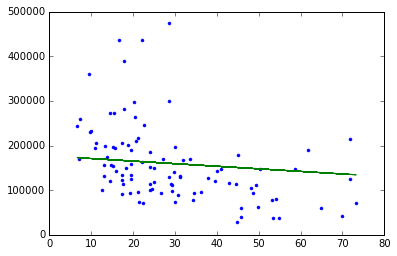

In [19]:
plt.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'],'.',
        sales_noCC['CrimeRate'], crime_model.predict(sales_noCC),'-')

In [20]:
crime_model.get('coefficients')

name,index,value,stderr
(intercept),None,176626.046881,11245.5882194
CrimeRate,None,-576.804949058,226.90225951


In [21]:
crime_model_noCC.get("coefficients")

name,index,value,stderr
(intercept),None,225204.604303,16404.0247514
CrimeRate,None,-2287.69717443,491.537478123


In [22]:
sales_nohighend = sales_noCC[sales_noCC['HousePrice'] < 350000]

In [24]:
crime_model_nohighend = graphlab.linear_regression.create(sales_nohighend, target='HousePrice', features=['CrimeRate'],validation_set=None, verbose=False)

In [25]:
crime_model_noCC.get('coefficients')

name,index,value,stderr
(intercept),None,225204.604303,16404.0247514
CrimeRate,None,-2287.69717443,491.537478123


In [26]:
crime_model_nohighend.get('coefficients')

name,index,value,stderr
(intercept),None,199073.589615,11932.5101105
CrimeRate,None,-1837.71280989,351.519609333


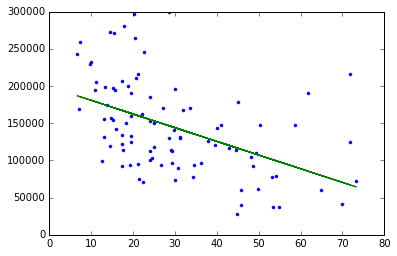

In [28]:
plt.plot(sales_nohighend['CrimeRate'], sales_nohighend['HousePrice'],'.',
        sales_nohighend['CrimeRate'], crime_model_nohighend.predict(sales_nohighend),'-')